In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('averaged_perceptron_tagger')
import imageio
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
# importing preliminaries
%pylab inline
import re
import math
import string
from collections import Counter
from nltk.probability import FreqDist
import seaborn as sns
import re
import math
import string
from collections import Counter
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sklearn
#from __future__ import division

Populating the interactive namespace from numpy and matplotlib


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\奥拉朱旺\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\奥拉朱旺\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\奥拉朱旺\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\奥拉朱旺\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [31]:
data=pd.read_pickle('cleaned_df_3.pkl')
data.head()

,Row,Transaction Id,Anon Student Id,Session Id,Time,Duration (sec),Student Response Subtype,Level (Assignment),Level (ProblemSet),Problem Name,...,CF (Completion History),CF (Team ID),CF (Team Position),CF (collaborating_sessions),CF (step_id),CF (tool_event_time),CF (tutor_event_time),word_list,num_list,symb_list
0,196,bf7a5b63ef96de9709f1895361fb19f1,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:26,132.5,NaN,Show what you know A,Assessment_A,5,...,"1,1,1,1,0,0,0,0,0,0,0,0,0,0,0",NaN,NaN,NaN,236.0,2016-05-02 16:26:26.214 UTC,2016-05-02 16:26:26.260 UTC,"[no, because, you, don't, change, the, denomin...",[],[]
1,197,38fee116e6f889f4f8947e8d3223c4e9,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:36,581,NaN,Show what you know A,Assessment_A,6,...,"1,1,1,1,1,0,0,0,0,0,0,0,0,0,0",NaN,NaN,NaN,236.0,2016-05-02 16:36:09.528 UTC,2016-05-02 16:36:09.561 UTC,"[i, do, not, know, the, answer]",[],[]
2,723,614e41dfdf003a358e222dd25bd3fb37,Stu_005a9729f8e3869ff12b105e0f7bb82e,S8b8b56ba097e11d7d5e2da54ccf54883,5/4/16 12:32,15.75,Student2,Equivalent Erroneous Collaboration,Erroneous_Equivalent_Collaboration,1a,...,"0,0,0,0,0,0,0,0",RGFyaWVuWixPbGl2aWFN,1 of 2,"S8b8b56ba097e11d7d5e2da54ccf54883,S031525ce931...",32.0,2016-05-04 16:32:27.244 UTC,2016-05-04 16:32:27.258 UTC,"[first, you, need, to, double, the, denominato...",[],[]
3,758,d17966ae23e35d2fae1bbeb81a43420f,Stu_005a9729f8e3869ff12b105e0f7bb82e,S8b8b56ba097e11d7d5e2da54ccf54883,5/4/16 12:35,0.333,NaN,Equivalent Erroneous Collaboration,Erroneous_Equivalent_Collaboration,2a,...,"1,0,0,0,0,0,0,0",RGFyaWVuWixPbGl2aWFN,1 of 2,"S8b8b56ba097e11d7d5e2da54ccf54883,S031525ce931...",32.0,2016-05-04 16:35:03.999 UTC,2016-05-04 16:35:04.36 UTC,"[first, multiply, the, denominator, by, two, t...",[],[]
4,801,34ee74f0538238c268ee22dea94817d8,Stu_005a9729f8e3869ff12b105e0f7bb82e,S8b8b56ba097e11d7d5e2da54ccf54883,5/4/16 12:37,11,Student2,Equivalent Erroneous Collaboration,Erroneous_Equivalent_Collaboration,3a,...,"1,1,0,0,0,0,0,0",RGFyaWVuWixPbGl2aWFN,1 of 2,"S8b8b56ba097e11d7d5e2da54ccf54883,S031525ce931...",32.0,2016-05-04 16:37:25.446 UTC,2016-05-04 16:37:25.457 UTC,"[first, multiply, 8, NUMBER, by, 2, NUMBER, th...","[8, 2]",[]


In [32]:
import codecs
from sklearn import feature_extraction 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
data['Level (ProblemSet)'].value_counts()

Erroneous_LCD_Collaboration                           1318
Erroneous_Comparing_Collaboration                     1192
Assessment_A                                           846
Assessment_B                                           835
Erroneous_LCD_Individual                               819
Erroneous_Comparing_Individual                         732
Erroneous_Equivalent_Collaboration                     724
Erroneous_Equivalent_Individual                        498
Erroneous_EquivalentLCD_Collaboration                  158
Erroneous_ComparingAddingSubtracting_Collaboration     102
Erroneous_NamingMaking_Collaboration                    76
Erroneous_NamingMaking_Individual                       13
Erroneous_ComparingAddingSubtracting_Individual         12
Erroneous_EquivalentLCD_Individual                       4
Name: Level (ProblemSet), dtype: int64

In [34]:
data['Level (Assignment)'].value_counts()

LCD Erroneous Collaboration                                   1318
Comparing Erroneous Collaboration                             1192
LCD Erroneous Individual                                       795
Equivalent Erroneous Collaboration                             724
Comparing Erroneous Individual                                 720
Equivalent Erroneous Individual                                489
Show what you learned B                                        446
Show what you learned A                                        431
Show what you know A                                           415
Show what you know B                                           389
Equivalent and LCD Erroneous Collaboration                     158
Comparing, Adding, and Subtracting Erroneous Collaboration     102
Naming and Making Erroneous Collaboration                       76
LCD Erroneous Group                                             24
Naming and Making Erroneous Individual                        

In [35]:
data['problem']=0
for i in range(len(data)):
    data['problem'][i]=int(data['Problem Name'][i][0])
data['problem'].value_counts()

D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


5    1493
6    1251
1    1198
2    1046
3     909
4     692
7     396
8     344
Name: problem, dtype: int64

In [36]:
data['Level (Assignment)'].value_counts()

LCD Erroneous Collaboration                                   1318
Comparing Erroneous Collaboration                             1192
LCD Erroneous Individual                                       795
Equivalent Erroneous Collaboration                             724
Comparing Erroneous Individual                                 720
Equivalent Erroneous Individual                                489
Show what you learned B                                        446
Show what you learned A                                        431
Show what you know A                                           415
Show what you know B                                           389
Equivalent and LCD Erroneous Collaboration                     158
Comparing, Adding, and Subtracting Erroneous Collaboration     102
Naming and Making Erroneous Collaboration                       76
LCD Erroneous Group                                             24
Naming and Making Erroneous Individual                        

In [37]:
word_tokenize(data.Input[0])

['no',
 ',',
 'because',
 'you',
 'do',
 "n't",
 'change',
 'the',
 'denominater',
 'so',
 'this',
 'why',
 'this',
 'answer',
 'is',
 'wrong',
 '.']

In [38]:
data.word_list[0]

['no',
 'because',
 'you',
 "don't",
 'change',
 'the',
 'denominator',
 'so',
 'the',
 'why',
 'the',
 'answer',
 'be',
 'wrong']

In [39]:
data['new_answer']=''
all_answer=[]
for i in range(len(data)):
    for temp_word in data.word_list[i]:
        data.new_answer[i]=data.new_answer[i]+temp_word+' '
    all_answer=all_answer+[data.new_answer[i]]

D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [40]:
data.new_answer[0]

"no because you don't change the denominator so the why the answer be wrong "

In [41]:
all_answer[:10]

["no because you don't change the denominator so the why the answer be wrong ",
 'i do not know the answer ',
 'first you need to double the denominator then do the same to the numerator ',
 'first multiply the denominator by two then do the same to the numerator ',
 'first multiply 8 NUMBER by 2 NUMBER then do the same to the numerator ',
 'first must the denominator by 2 NUMBER then do the same for the numerator ',
 'first multiply the denominator by 2 NUMBER and do the same to the numerator ',
 'he need to find the least common denominator so they will both be equal he also need to find they multiply and factor ',
 'next time olivia times to find the least common denominator she need to look at her number more careful she had the 1 NUMBER and the 7 NUMBER mixed up ',
 'next time kaitie need to compare 12 NUMBER and 8 NUMBER with the factor and multiply of 8 NUMBER and 12 NUMBER and find there similar ']

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(all_answer)

from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=False)
tfidf = transformer.fit_transform(X)
print(tfidf.shape )   

(7329, 664)


In [43]:
tfidf

<7329x664 sparse matrix of type '<class 'numpy.float64'>'
	with 67373 stored elements in Compressed Sparse Row format>

In [44]:
data['Student Response Subtype']=data['Student Response Subtype'].fillna('individual')
data['Student Response Subtype'].value_counts()

individual    5515
Student1       959
Student2       853
Student3         2
Name: Student Response Subtype, dtype: int64

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=10, max_features=1000, stop_words='english', ngram_range=(1,5))
tfidf_vectorizer=TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(all_answer)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

In [46]:
'''
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8).fit(tfidf)
km_predict=kmeans.predict(tfidf_vectorizer.transform(all_answer))
data['km_cluster']=0
for i in range(len(data)):
    data['km_cluster'][i]=km_predict[i]
'''

"\nfrom sklearn.cluster import KMeans\nkmeans = KMeans(n_clusters=8).fit(tfidf)\nkm_predict=kmeans.predict(tfidf_vectorizer.transform(all_answer))\ndata['km_cluster']=0\nfor i in range(len(data)):\n    data['km_cluster'][i]=km_predict[i]\n"

In [47]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10).fit(tfidf)
km_predict=kmeans.predict(tfidf_vectorizer.transform(all_answer))
km_predict

array([7, 0, 5, ..., 2, 7, 2])

In [48]:
data['km_cluster']=0
for i in range(len(data)):
    data['km_cluster'][i]=km_predict[i]

D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [51]:
for i in range(10):
    print('For K-means cluster ' + str(i))
    temp_stat=data[data['km_cluster']==i]['Level (Assignment)'].value_counts()/len(data[data['km_cluster']==i]['Level (Assignment)'])
    print(temp_stat)
    print('-----------------------------------------')


For K-means cluster 0
Comparing Erroneous Collaboration                             0.196744
LCD Erroneous Collaboration                                   0.160930
LCD Erroneous Individual                                      0.151628
Comparing Erroneous Individual                                0.147442
Equivalent Erroneous Collaboration                            0.098605
Equivalent Erroneous Individual                               0.071163
Show what you learned B                                       0.033023
Show what you learned A                                       0.030698
Show what you know A                                          0.024651
Naming and Making Erroneous Collaboration                     0.022326
Show what you know B                                          0.020000
Equivalent and LCD Erroneous Collaboration                    0.018605
Comparing, Adding, and Subtracting Erroneous Collaboration    0.013953
Naming and Making Erroneous Individual                 

In [52]:
for i in range(10):
    print('For K-means cluster ' + str(i))
    temp_stat=data[data['km_cluster']==i]['problem'].value_counts()/len(data[data['km_cluster']==i]['problem'])
    print(temp_stat)
    print('-----------------------------------------')

For K-means cluster 0
5    0.183721
1    0.156279
2    0.151628
3    0.128837
4    0.126977
6    0.113488
7    0.078605
8    0.060465
Name: problem, dtype: float64
-----------------------------------------
For K-means cluster 1
2    0.186207
3    0.179310
1    0.172414
5    0.124138
4    0.113793
6    0.096552
7    0.075862
8    0.051724
Name: problem, dtype: float64
-----------------------------------------
For K-means cluster 2
6    0.434604
5    0.181256
1    0.168898
3    0.076210
2    0.061792
8    0.031926
4    0.029866
7    0.015448
Name: problem, dtype: float64
-----------------------------------------
For K-means cluster 3
3    0.225806
5    0.207373
1    0.133641
4    0.115207
2    0.115207
6    0.092166
7    0.059908
8    0.050691
Name: problem, dtype: float64
-----------------------------------------
For K-means cluster 4
6    0.206299
2    0.179528
1    0.170079
5    0.159055
3    0.107087
4    0.080315
8    0.051969
7    0.045669
Name: problem, dtype: float64
------------

In [53]:
for i in range(10):
    print('For K-means cluster ' + str(i))
    temp_stat=data[data['km_cluster']==i]['Level (ProblemSet)'].value_counts()/len(data[data['km_cluster']==i]['Level (ProblemSet)'])
    print(temp_stat)
    print('-----------------------------------------')


For K-means cluster 0
Erroneous_Comparing_Collaboration                     0.196744
Erroneous_LCD_Collaboration                           0.160930
Erroneous_LCD_Individual                              0.153023
Erroneous_Comparing_Individual                        0.147442
Erroneous_Equivalent_Collaboration                    0.098605
Erroneous_Equivalent_Individual                       0.073953
Assessment_A                                          0.055349
Assessment_B                                          0.053023
Erroneous_NamingMaking_Collaboration                  0.022326
Erroneous_EquivalentLCD_Collaboration                 0.018605
Erroneous_ComparingAddingSubtracting_Collaboration    0.013953
Erroneous_NamingMaking_Individual                     0.004651
Erroneous_ComparingAddingSubtracting_Individual       0.001395
Name: Level (ProblemSet), dtype: float64
-----------------------------------------
For K-means cluster 1
Erroneous_LCD_Collaboration                           

In [54]:
for i in range(10):
    print('For K-means cluster ' + str(i))
    temp_stat=data[data['km_cluster']==i]['Student Response Subtype'].value_counts()/len(data[data['km_cluster']==i]['Student Response Subtype'])
    print(temp_stat)
    print('-----------------------------------------')


For K-means cluster 0
individual    0.741860
Student1      0.145581
Student2      0.111628
Student3      0.000930
Name: Student Response Subtype, dtype: float64
-----------------------------------------
For K-means cluster 1
individual    0.575862
Student1      0.272414
Student2      0.151724
Name: Student Response Subtype, dtype: float64
-----------------------------------------
For K-means cluster 2
individual    0.84758
Student2      0.07724
Student1      0.07518
Name: Student Response Subtype, dtype: float64
-----------------------------------------
For K-means cluster 3
individual    0.649770
Student1      0.182028
Student2      0.168203
Name: Student Response Subtype, dtype: float64
-----------------------------------------
For K-means cluster 4
individual    0.766929
Student1      0.130709
Student2      0.102362
Name: Student Response Subtype, dtype: float64
-----------------------------------------
For K-means cluster 5
individual    0.663959
Student2      0.178680
Student1    

In [55]:
from sklearn.cluster import SpectralClustering
sp_cluster = SpectralClustering(n_clusters=10, gamma=0.1).fit_predict(tfidf)
sp_cluster

array([2, 3, 2, ..., 2, 9, 1])

In [56]:
data['sp_cluster']=0
for i in range(len(data)):
    data['sp_cluster'][i]=sp_cluster[i]
for i in range(10):
    print('For Spectral Cluster ' + str(i))
    temp_stat=data[data['sp_cluster']==i]['Level (Assignment)'].value_counts()/len(data[data['sp_cluster']==i]['Level (Assignment)'])
    print(temp_stat)
    print('-----------------------------------------')

D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


For Spectral Cluster 0
Equivalent Erroneous Collaboration                            0.295203
Equivalent Erroneous Individual                               0.254613
Comparing Erroneous Collaboration                             0.129151
LCD Erroneous Collaboration                                   0.099631
Comparing Erroneous Individual                                0.084871
LCD Erroneous Individual                                      0.070111
Equivalent and LCD Erroneous Collaboration                    0.051661
Comparing, Adding, and Subtracting Erroneous Collaboration    0.007380
Comparing, Adding, and Subtracting Erroneous Individual       0.005535
Equivalent and LCD Erroneous Individual                       0.001845
Name: Level (Assignment), dtype: float64
-----------------------------------------
For Spectral Cluster 1
Show what you know B                                          0.244582
Show what you learned A                                       0.216718
Show what you learn

In [57]:
data['sp_cluster']=0
for i in range(len(data)):
    data['sp_cluster'][i]=sp_cluster[i]
for i in range(10):
    print('For Spectral Cluster ' + str(i))
    temp_stat=data[data['sp_cluster']==i]['problem'].value_counts()/len(data[data['sp_cluster']==i]['problem'])
    print(temp_stat)
    print('-----------------------------------------')

D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


For Spectral Cluster 0
2    0.249077
1    0.158672
3    0.140221
4    0.127306
5    0.103321
6    0.095941
7    0.066421
8    0.059041
Name: problem, dtype: float64
-----------------------------------------
For Spectral Cluster 1
6    0.783282
5    0.113003
1    0.040248
3    0.024768
2    0.018576
4    0.009288
7    0.006192
8    0.004644
Name: problem, dtype: float64
-----------------------------------------
For Spectral Cluster 2
6    0.234637
1    0.234637
5    0.135196
2    0.125140
3    0.117318
4    0.065922
8    0.051397
7    0.035754
Name: problem, dtype: float64
-----------------------------------------
For Spectral Cluster 3
5    0.172985
1    0.159103
2    0.142552
4    0.123332
6    0.122798
3    0.122798
7    0.083823
8    0.072611
Name: problem, dtype: float64
-----------------------------------------
For Spectral Cluster 4
3    0.256018
5    0.172867
1    0.144420
2    0.126915
4    0.102845
6    0.091904
7    0.059081
8    0.045952
Name: problem, dtype: float64
-------

In [58]:
data['sp_cluster']=0
for i in range(len(data)):
    data['sp_cluster'][i]=sp_cluster[i]
for i in range(10):
    print('For Spectral Cluster ' + str(i))
    temp_stat=data[data['sp_cluster']==i]['Level (ProblemSet)'].value_counts()/len(data[data['sp_cluster']==i]['Level (ProblemSet)'])
    print(temp_stat)
    print('-----------------------------------------')

D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


For Spectral Cluster 0
Erroneous_Equivalent_Collaboration                    0.295203
Erroneous_Equivalent_Individual                       0.254613
Erroneous_Comparing_Collaboration                     0.129151
Erroneous_LCD_Collaboration                           0.099631
Erroneous_Comparing_Individual                        0.084871
Erroneous_LCD_Individual                              0.070111
Erroneous_EquivalentLCD_Collaboration                 0.051661
Erroneous_ComparingAddingSubtracting_Collaboration    0.007380
Erroneous_ComparingAddingSubtracting_Individual       0.005535
Erroneous_EquivalentLCD_Individual                    0.001845
Name: Level (ProblemSet), dtype: float64
-----------------------------------------
For Spectral Cluster 1
Assessment_B                                          0.458204
Assessment_A                                          0.422601
Erroneous_Comparing_Collaboration                     0.049536
Erroneous_Comparing_Individual                      

In [59]:
for i in range(10):
    print('For Spectral Cluster ' + str(i))
    temp_stat=data[data['sp_cluster']==i]['Student Response Subtype'].value_counts()/len(data[data['sp_cluster']==i]['Student Response Subtype'])
    print(temp_stat)
    print('-----------------------------------------')


For Spectral Cluster 0
individual    0.708487
Student1      0.169742
Student2      0.121771
Name: Student Response Subtype, dtype: float64
-----------------------------------------
For Spectral Cluster 1
individual    0.967492
Student1      0.018576
Student2      0.013932
Name: Student Response Subtype, dtype: float64
-----------------------------------------
For Spectral Cluster 2
individual    0.738547
Student2      0.138547
Student1      0.122905
Name: Student Response Subtype, dtype: float64
-----------------------------------------
For Spectral Cluster 3
individual    0.754405
Student1      0.145755
Student2      0.099840
Name: Student Response Subtype, dtype: float64
-----------------------------------------
For Spectral Cluster 4
individual    0.632385
Student2      0.192560
Student1      0.175055
Name: Student Response Subtype, dtype: float64
-----------------------------------------
For Spectral Cluster 5
individual    0.729877
Student2      0.152797
Student1      0.114598
Stu

In [62]:
data['km_cluster'].value_counts()

0    2150
5     985
2     971
9     683
4     635
7     597
3     434
6     351
1     290
8     233
Name: km_cluster, dtype: int64

In [63]:
data['sp_cluster'].value_counts()

3    1873
2     895
5     733
6     700
1     646
8     619
9     591
0     542
4     457
7     273
Name: sp_cluster, dtype: int64

In [64]:
data['problem'].value_counts()

5    1493
6    1251
1    1198
2    1046
3     909
4     692
7     396
8     344
Name: problem, dtype: int64

In [65]:
data['Level (Assignment)'].value_counts()

LCD Erroneous Collaboration                                   1318
Comparing Erroneous Collaboration                             1192
LCD Erroneous Individual                                       795
Equivalent Erroneous Collaboration                             724
Comparing Erroneous Individual                                 720
Equivalent Erroneous Individual                                489
Show what you learned B                                        446
Show what you learned A                                        431
Show what you know A                                           415
Show what you know B                                           389
Equivalent and LCD Erroneous Collaboration                     158
Comparing, Adding, and Subtracting Erroneous Collaboration     102
Naming and Making Erroneous Collaboration                       76
LCD Erroneous Group                                             24
Naming and Making Erroneous Individual                        

In [66]:
from scipy import stats
from scipy.stats import ttest_ind

In [67]:
ttest_ind(data['km_cluster'].value_counts().values,data['problem'].value_counts().values)

Ttest_indResult(statistic=-0.7697019974801634, pvalue=0.45269131030050525)

In [68]:
ttest_ind(data['km_cluster'].value_counts().values,data['Level (Assignment)'].value_counts().values)

Ttest_indResult(statistic=1.9114360063952869, pvalue=0.06661746680593573)

In [69]:
ttest_ind(data['sp_cluster'].value_counts().values,data['problem'].value_counts().values)

Ttest_indResult(statistic=-0.9102460181370198, pvalue=0.3762019885817415)

In [70]:
ttest_ind(data['sp_cluster'].value_counts().values,data['Level (Assignment)'].value_counts().values)

Ttest_indResult(statistic=2.132765123316173, pvalue=0.0421875720763319)

In [71]:
sklearn.metrics.homogeneity_completeness_v_measure(np.array([1,1,2,2,3]), np.array([1,1,1,1,1]), beta=1.0)

(-2.1048474724766827e-16, 1.0, -4.2096949449533665e-16)

In [72]:
#sklearn.metrics.homogeneity_completeness_v_measure(data['km_cluster'], data['problem'], beta=1.0)

In [73]:
sklearn.metrics.homogeneity_completeness_v_measure(data['km_cluster'], data['problem'], beta=1.0)

(0.09243298370554853, 0.09719825075647077, 0.09475574373461276)

In [74]:
sklearn.metrics.homogeneity_completeness_v_measure(data['km_cluster'], data['Level (Assignment)'], beta=1.0)

(0.17467158817818298, 0.15235173763290333, 0.16274998065072535)

In [75]:
sklearn.metrics.homogeneity_completeness_v_measure(data['sp_cluster'], data['problem'], beta=1.0)

(0.08877072801980328, 0.09733583943297298, 0.09285618930214481)

In [76]:
sklearn.metrics.homogeneity_completeness_v_measure(data['sp_cluster'], data['Level (Assignment)'], beta=1.0)

(0.1404742038315939, 0.12775951139004102, 0.13381550957977353)

In [77]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=3, min_samples=10)
db_predict=db.fit(tfidf_vectorizer.transform(all_answer))
db_label=db_predict.labels_
db_label

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [78]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap
#pca=PCA(n_components=3, copy=True, whiten=True, tol=1e-5)
iso=Isomap(n_components=3, )#n_neighbors=5)
iso_predict=iso.fit_transform(tfidf)

In [79]:
iso_predict

array([[-0.457565  , -0.75920464, -0.46446777],
       [ 0.60681811,  0.2839543 ,  0.94401889],
       [ 0.47435104, -0.84857618,  0.65385112],
       ...,
       [-1.25397679,  0.35867603,  0.57552524],
       [-0.72874099, -0.55528368,  0.10881042],
       [-1.60002815,  1.44544916, -0.79996024]])

In [80]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=3, n_iter=10, random_state=None)
svd_predict = svd.fit_transform(tfidf)
svd_predict

array([[ 0.34149236, -0.22476486,  0.07366431],
       [ 0.2088572 , -0.12775874, -0.04022211],
       [ 0.4994601 , -0.22506149, -0.25881204],
       ...,
       [ 0.30175147, -0.25338975,  0.13687828],
       [ 0.21882755, -0.13122823,  0.14781417],
       [ 0.31574013, -0.22644845,  0.50475185]])

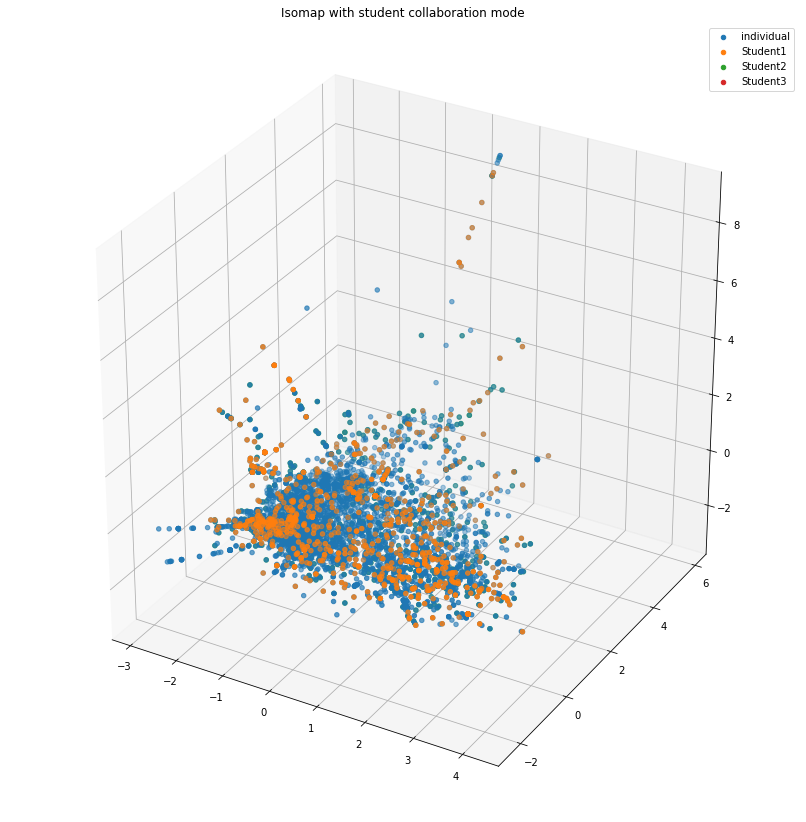

In [81]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['Student Response Subtype'].value_counts().index:
    mask = data['Student Response Subtype'] == temp_state
    ax.scatter(iso_predict[mask, 0], iso_predict[mask, 1], iso_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('Isomap with student collaboration mode')
plt.show()

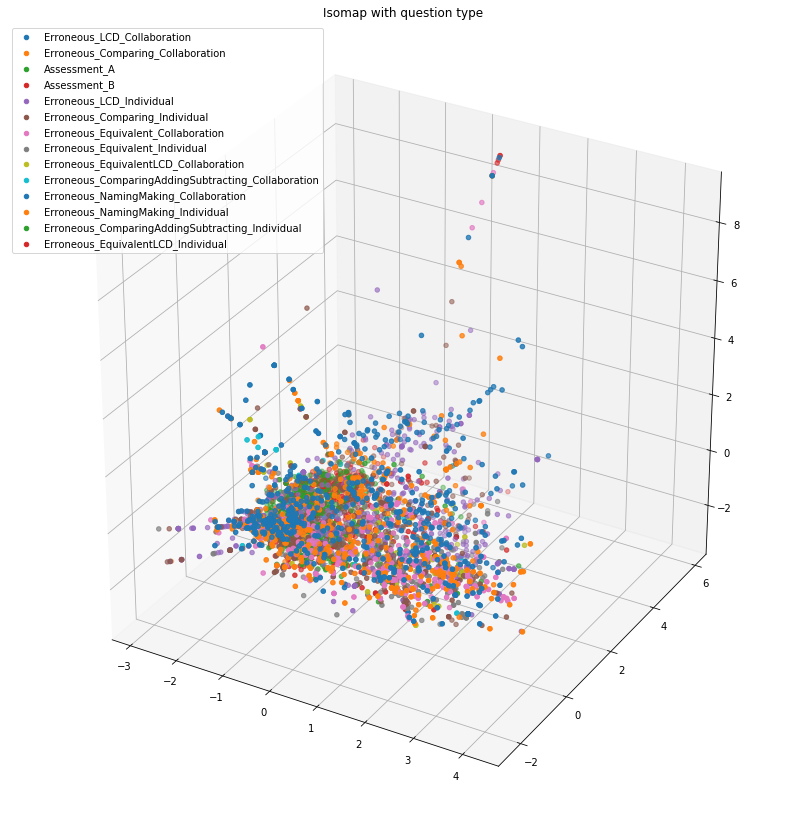

In [82]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['Level (ProblemSet)'].value_counts().index:
    mask = data['Level (ProblemSet)'] == temp_state
    ax.scatter(iso_predict[mask, 0], iso_predict[mask, 1], iso_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('Isomap with question type')
plt.show()

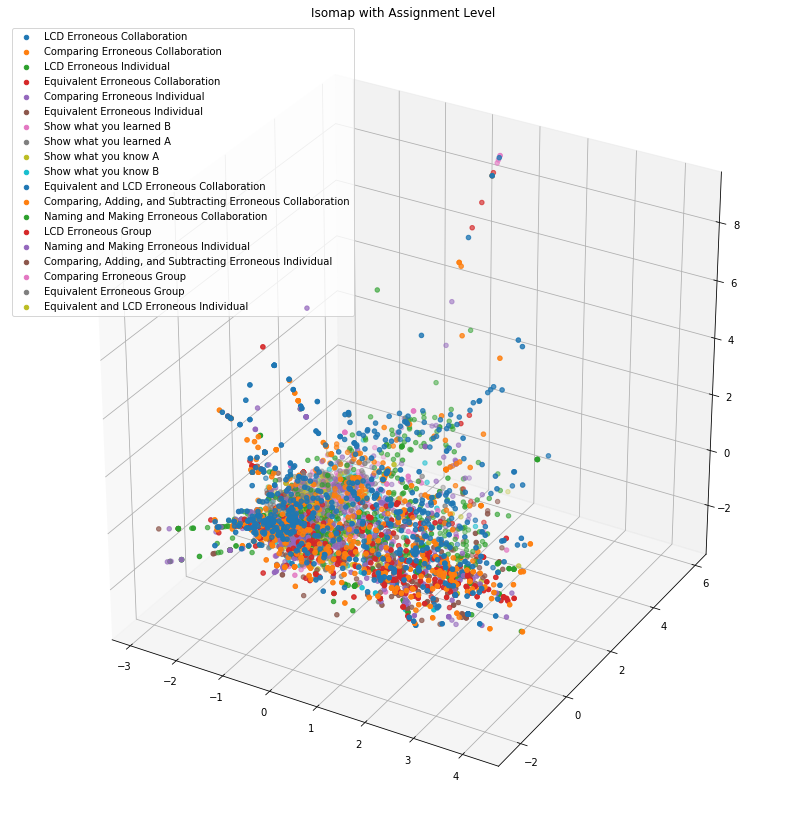

In [83]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['Level (Assignment)'].value_counts().index:
    mask = data['Level (Assignment)'] == temp_state
    ax.scatter(iso_predict[mask, 0], iso_predict[mask, 1], iso_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('Isomap with Assignment Level')
plt.show()

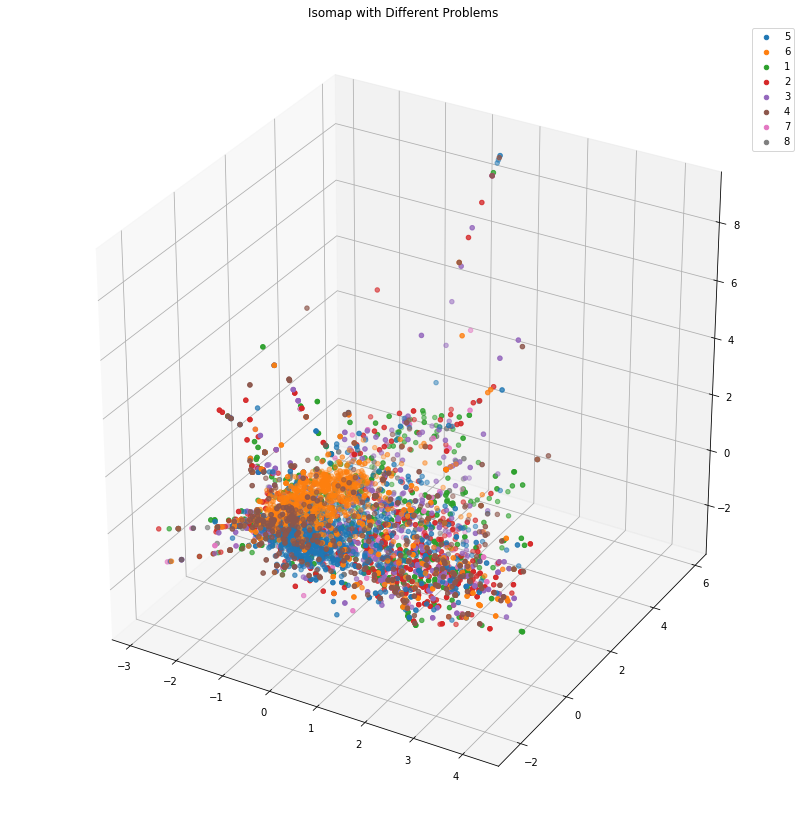

In [84]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['problem'].value_counts().index:
    mask = data['problem'] == temp_state
    ax.scatter(iso_predict[mask, 0], iso_predict[mask, 1], iso_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('Isomap with Different Problems')
plt.show()

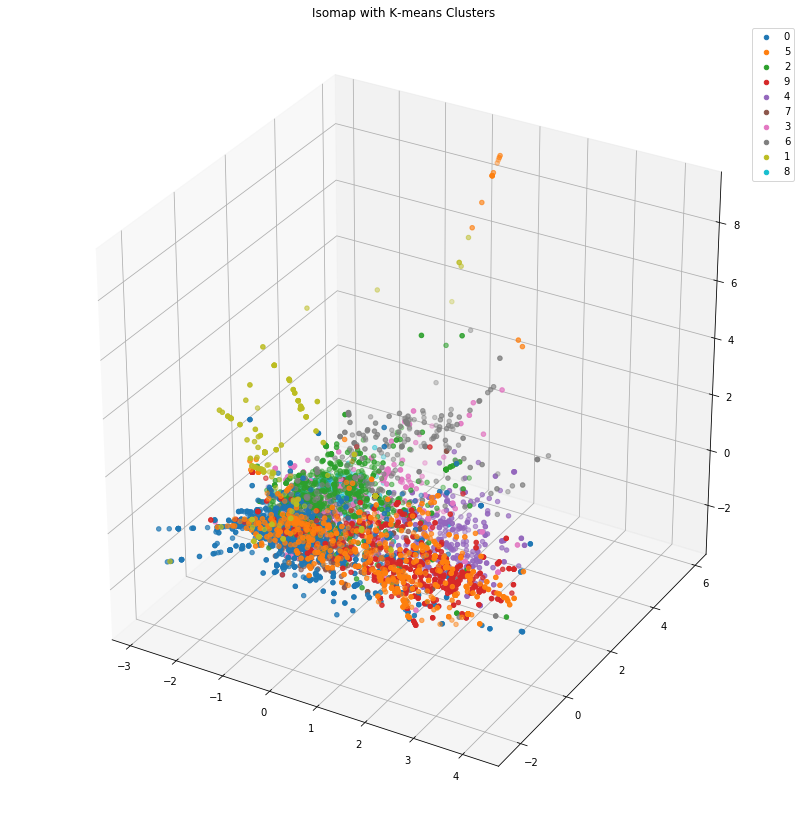

In [85]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['km_cluster'].value_counts().index:
    mask = data['km_cluster'] == temp_state
    ax.scatter(iso_predict[mask, 0], iso_predict[mask, 1], iso_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('Isomap with K-means Clusters')
plt.show()

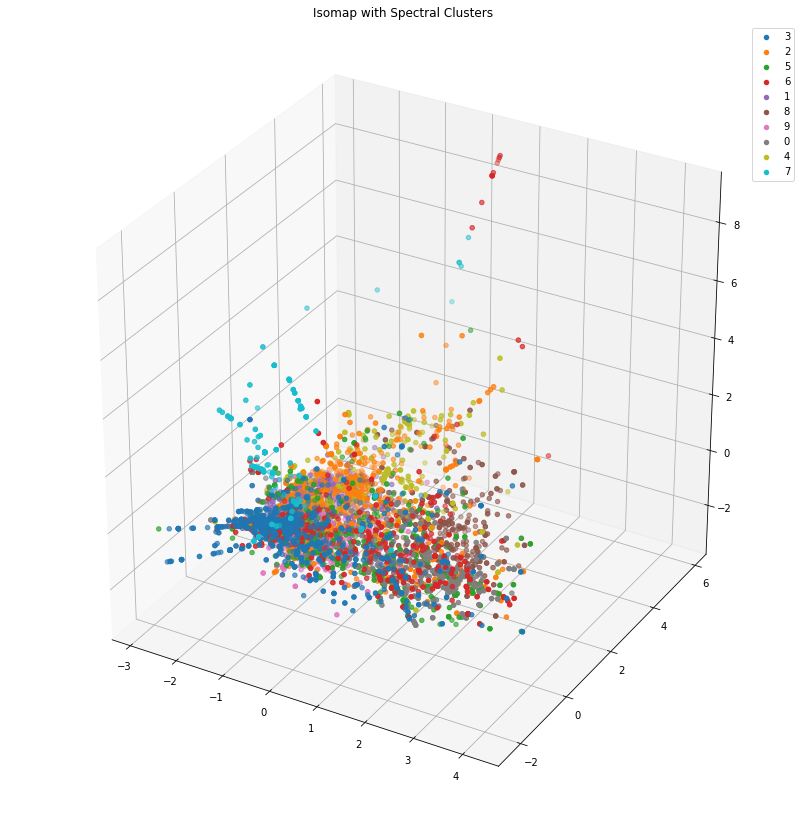

In [86]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['sp_cluster'].value_counts().index:
    mask = data['sp_cluster'] == temp_state
    ax.scatter(iso_predict[mask, 0], iso_predict[mask, 1], iso_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('Isomap with Spectral Clusters')
plt.show()

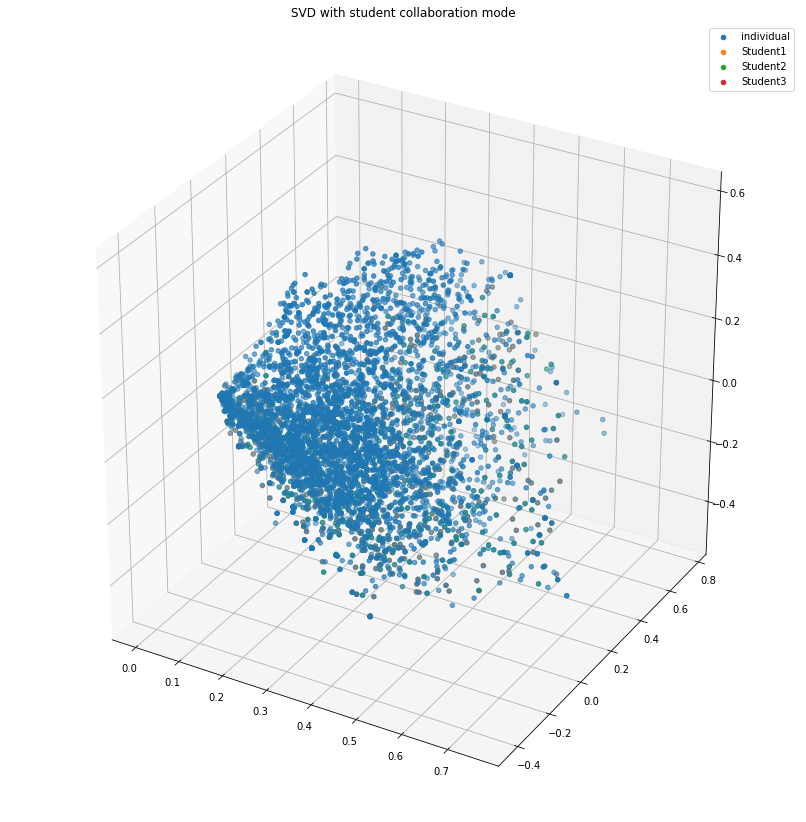

In [87]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['Student Response Subtype'].value_counts().index:
    mask = data['Student Response Subtype'] == temp_state
    ax.scatter(svd_predict[mask, 0], svd_predict[mask, 1], svd_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('SVD with student collaboration mode')
plt.show()

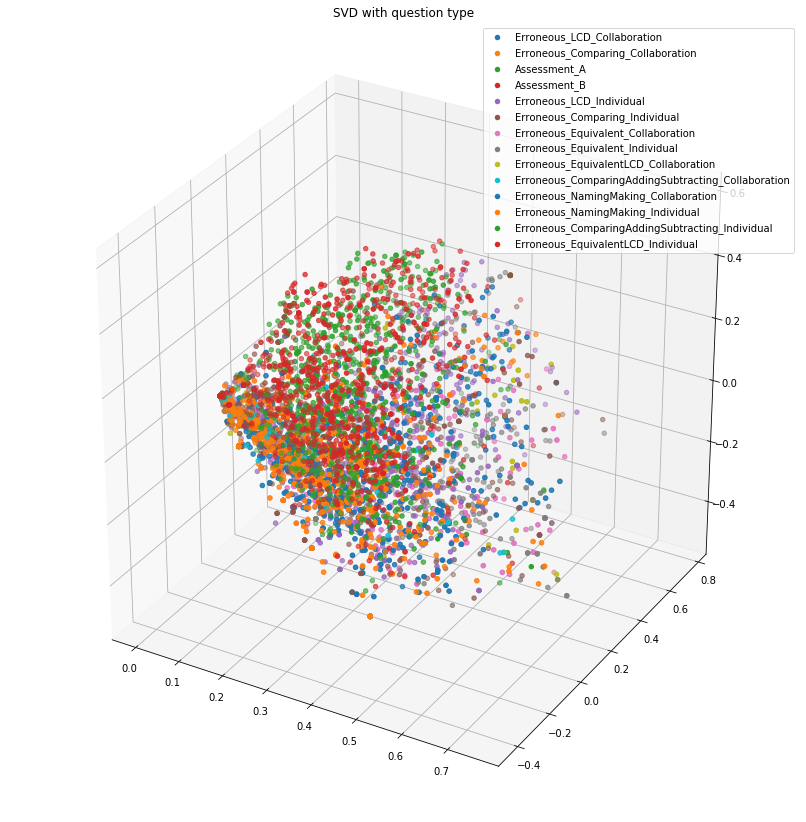

In [88]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['Level (ProblemSet)'].value_counts().index:
    mask = data['Level (ProblemSet)'] == temp_state
    ax.scatter(svd_predict[mask, 0], svd_predict[mask, 1], svd_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('SVD with question type')
plt.show()

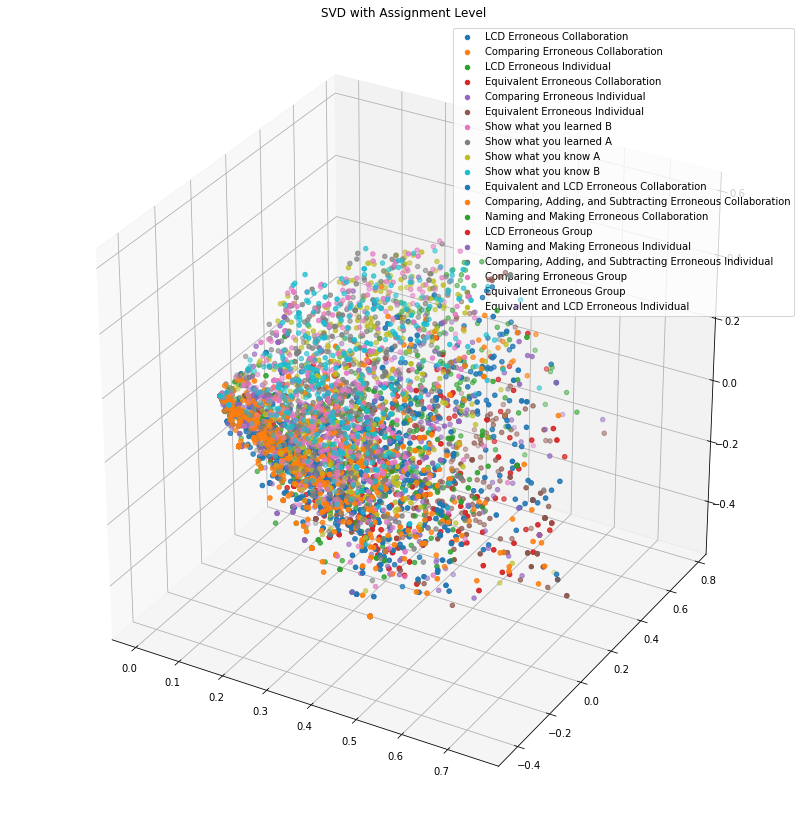

In [89]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['Level (Assignment)'].value_counts().index:
    mask = data['Level (Assignment)'] == temp_state
    ax.scatter(svd_predict[mask, 0], svd_predict[mask, 1], svd_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('SVD with Assignment Level')
plt.show()

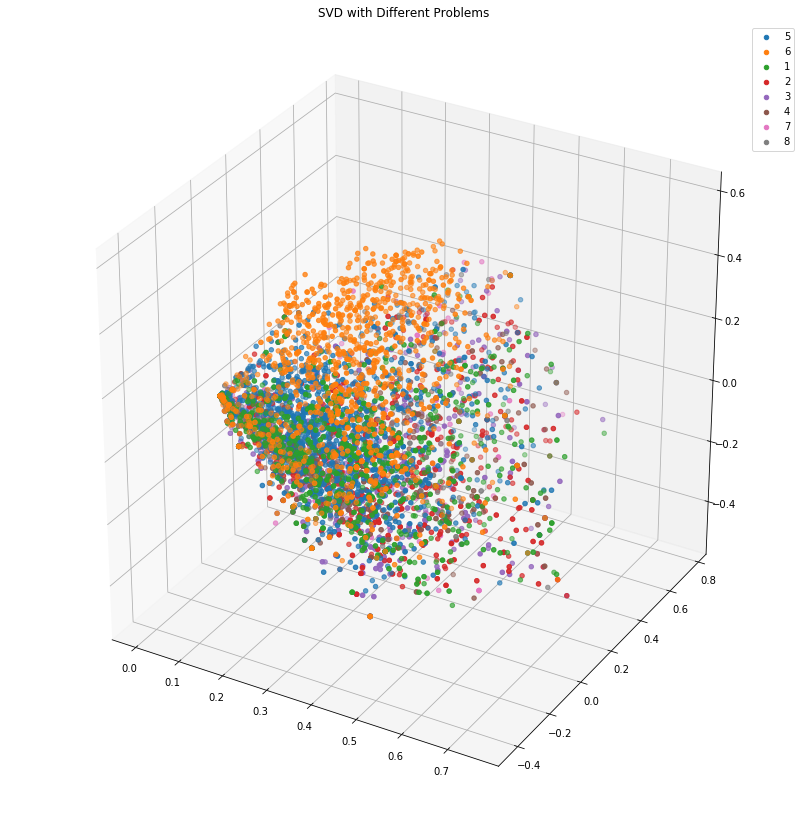

In [90]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['problem'].value_counts().index:
    mask = data['problem'] == temp_state
    ax.scatter(svd_predict[mask, 0], svd_predict[mask, 1], svd_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('SVD with Different Problems')
plt.show()

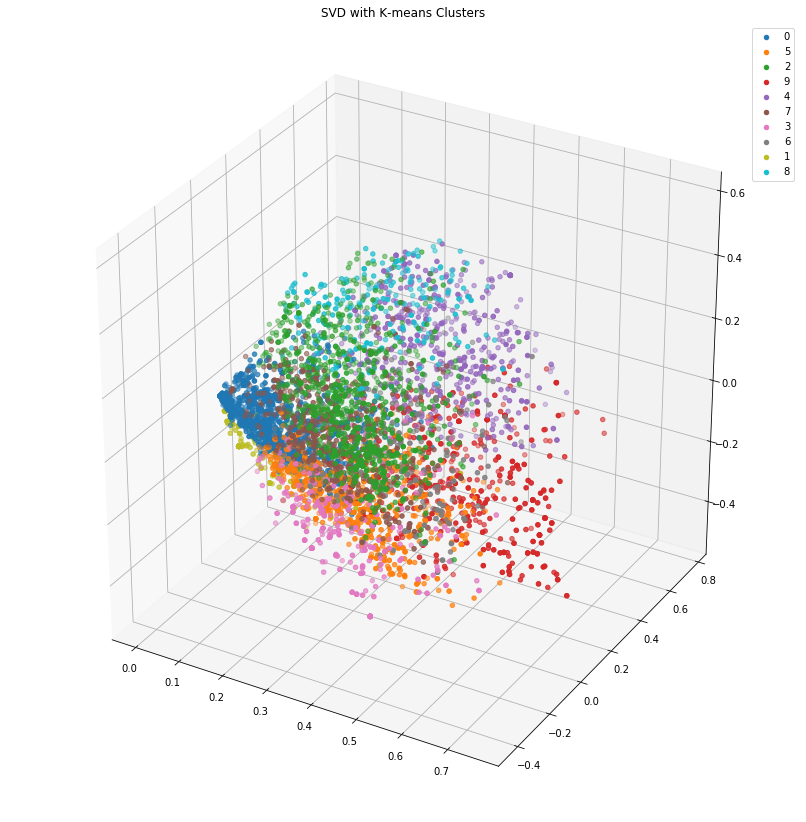

In [91]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['km_cluster'].value_counts().index:
    mask = data['km_cluster'] == temp_state
    ax.scatter(svd_predict[mask, 0], svd_predict[mask, 1], svd_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('SVD with K-means Clusters')
plt.show()

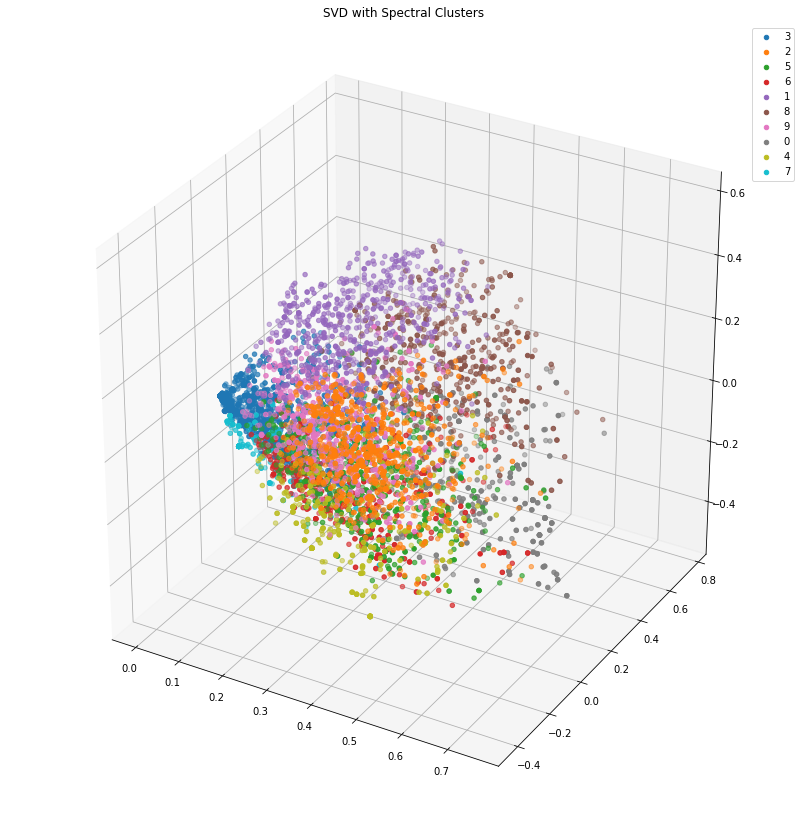

In [92]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['sp_cluster'].value_counts().index:
    mask = data['sp_cluster'] == temp_state
    ax.scatter(svd_predict[mask, 0], svd_predict[mask, 1], svd_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('SVD with Spectral Clusters')
plt.show()

In [93]:
sklearn.metrics.homogeneity_completeness_v_measure(data['km_cluster'], data['Level (Assignment)'], beta=1.0)

(0.17467158817818298, 0.15235173763290333, 0.16274998065072535)

In [94]:
#tf_vectorizer = CountVectorizer(max_df=0.90, min_df=10, max_features=1000, stop_words='english', ngram_range=(1,2))
tf_vectorizer = CountVectorizer()
tf = tf_vectorizer.fit_transform(all_answer)
tf_feature_names = tf_vectorizer.get_feature_names()

In [95]:
kmeans = KMeans(n_clusters=10).fit(tf)
kmeans.predict(tfidf_vectorizer.transform(all_answer))

array([2, 2, 2, ..., 2, 2, 2])